### Introduction

Introduction
The Caroline project was a part of a Digital Humanities assignment given to KU Leuven digital Humanities students. The assignment was comprised of two parts. Part one, was a data cleaning exercise using the tool Open Refine. The second a Data Analysis part where a student needed to assess their cleaned data for limitations and then thing of a research question that they could answer using data analytics methods. The Caroline Project is a data set created from the old Antwerp Guilds records from 1599 until 1706. These records contained data on members position in the Guild, their role, first and last name and the date of entry for year, month and day.

The main limitation with the Caroline project data set, as with all historical data, is the limited amount of information or missing information. This can be seen in the Caroline project data set under the column role. Here was meant to be space what type of role the member had in the guild however, this was more often filled with the enter member and very few actual roles. This means that analysis would be speculative with entries that do have role, eg painter because of simply how few entries are filled out compared to the overall entries in the data set. This is the major flaw of the data set and really limits the types of analysis or research questions one can conduct on it.

Despite the above statements, two interesting research questions one could look into using the Caroline project data set how did members position change over time as they rose through the different positions in the guilds. Sub question could look at how many apprentices where the sons of craftsman, looking at social mobility. Were their a major difference in numbers of masters and master’s craftsman, looking at promotion and skill levels.  The second topic One could look at is the frequency distribution of first or last names. This than could be analysed form a social historical angle of what the change in names can tell us about society or a linguistic approach about name characters.



In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None

from IPython.display import HTML

In [5]:
# extration of data and filtering the data set for the relevenet columns.

df = pd.read_excel(r'C:\Users\paul_\Documents\Data and Programing\Visual Studio Code\data sets\Cornelia_english_roles-xls-csv-xls-fv-xls.xls')

df_1= df[['date_year', 'actor_first_name', 'actor_surname', 'status']]

### Research Question One

Here we will explore how did members positions of: (master craftsman , master, apprentice, dean, Masters’ son, Edelman) changed over time with the sub questions looking at how many apprentices were there compared to the sons of guild craftsman and were there any major difference in numbers of masters and master’s craftsman at any point in time during the guilds history.

('master craftsman', 'master', 'apprentice', 'dean', 'masters’s son', 'elderman')


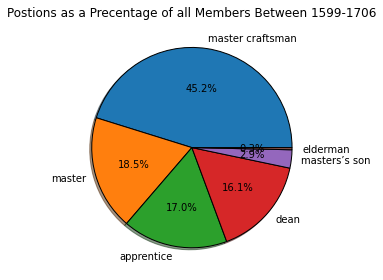

In [6]:
data_fig_1 = df_1['status'].value_counts(normalize=True)
lables_fig_1 =  ('master craftsman','master', 'apprentice', 'dean', 'masters’s son', 'elderman')
print (lables_fig_1)

plt.pie(data_fig_1, labels=lables_fig_1, shadow=True,  autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'} )
plt.title('Postions as a Precentage of all Members Between 1599-1706')
plt.tight_layout()
plt.show()



As expected figure One shows that master craftsman's make up the greatest number of guild members followed by master and then apprentices. This is a logical find as master craftsman's were the main body of workers within any guild and good indication about the reliability of our historical data.

In [7]:
data_fig_2 = df_1[['date_year', 'status']]
date = df_1['date_year'].drop_duplicates().sort_values(ascending=True)

Total_membertype_count = data_fig_2.groupby(['date_year'])['status'].count()
Total_membertype_count = pd.merge(date,Total_membertype_count, how='left', on='date_year')

date_ = Total_membertype_count['date_year']
number = Total_membertype_count['status']


<function matplotlib.pyplot.show(close=None, block=None)>

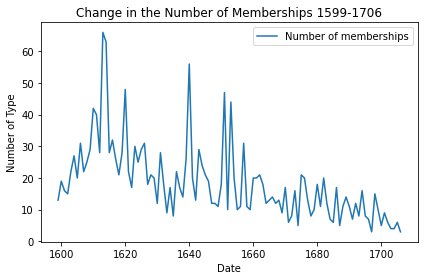

In [8]:
plt.plot(date_, number, label='Number of memberships')

plt.title('Change in the Number of Memberships 1599-1706')
plt.xlabel('Date')
plt.ylabel('Number of Type')
plt.legend()
plt.tight_layout()
plt.show

Figure Two shows us the total number of members over time of the Guild’s history 1599-1706. The figure shows an increase of membership until 1615 and then a slow decline followed by a step decline in 1630. This is than followed by a recover until 1670- 1680 when the guild sees the slow decline of its membership. What is most interesting in this figure is the step decline in 1630 and provides a indication to ask what happened during this time for memberships to drop so low.

In [9]:
data_fig_3 = df_1[['date_year', 'status']]
Membertype_count = data_fig_3.groupby(['date_year'])['status'].apply(lambda x: x.value_counts()).unstack().fillna(0)
date = df_1['date_year'].drop_duplicates().sort_values(ascending=True)

apprentice =  Membertype_count['apprentice']
dean = Membertype_count['dean']
elderman = Membertype_count['elderman']
master = Membertype_count['master']
master_craftsman = Membertype_count['master craftsman']
masters_son = Membertype_count['masters’s son']




<function matplotlib.pyplot.show(close=None, block=None)>

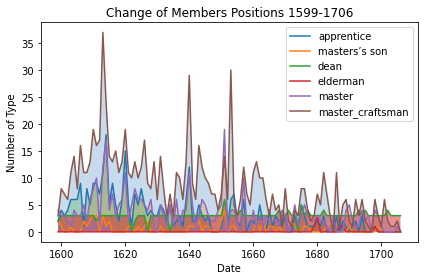

In [10]:

plt.plot(date, apprentice, label='apprentice')
plt.plot(date, masters_son, label='masters’s son')

plt.plot(date, dean, label='dean')
plt.plot(date, elderman, label='elderman')

plt.plot(date, master, label='master')
plt.plot(date, master_craftsman, label='master_craftsman')


plt.title('Change of Members Positions 1599-1706')
plt.xlabel('Date')
plt.ylabel('Number of Type')

plt.fill_between(date, master_craftsman, alpha=0.25)
plt.fill_between(date, master, alpha=0.25)

plt.fill_between(date, apprentice, alpha=0.25)
plt.fill_between(date, dean, alpha=0.50)


plt.fill_between(date, masters_son, alpha=0.50)
plt.fill_between(date, elderman, alpha=0.25)



plt.legend()
plt.tight_layout()
plt.show

Figure Three mirrors Figure Two shows and shows the increase of membership in 1615 and then followed by a decline and that same step decline in 1630. This is than followed by a recover until 1670- 1680 when the guild sees the slow decline of its membership until 1706.

<function matplotlib.pyplot.show(close=None, block=None)>

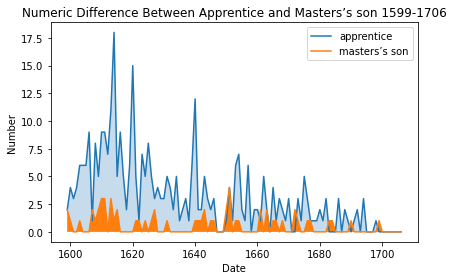

In [11]:
plt.plot(date, apprentice, label='apprentice')
plt.plot(date, masters_son, label='masters’s son')

plt.title('Numeric Difference Between Apprentice and Masters’s son 1599-1706')
plt.xlabel('Date')
plt.ylabel('Number')
plt.fill_between(date, apprentice, alpha=0.25)
plt.fill_between(date, masters_son)
plt.legend()
plt.tight_layout()
plt.show

Figure Four was made to help us answer the first sub research question about social mobility. Figure Four shows is that in fact there is evidence surprising high social motility as seen by the difference in number of apprentice and sons who are the sons of master or master's craftsmen. what is more interesting is that in 1630 there are no son’s masters registered in the guild. What this may mean is that the guild may have been an important instrument of social mobility in the city of Antwerp  for it allowed people with talent to join irrespective of family connections.

<function matplotlib.pyplot.show(close=None, block=None)>

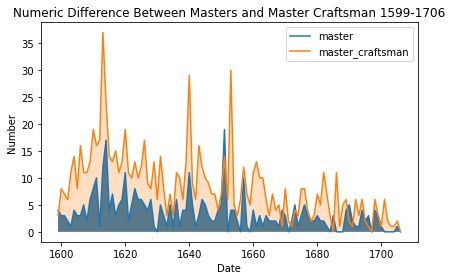

In [12]:
plt.plot(date, master, label='master')
plt.plot(date, master_craftsman, label='master_craftsman')

plt.title('Numeric Difference Between Masters and Master Craftsman 1599-1706')
plt.xlabel('Date')
plt.ylabel('Number')
plt.fill_between(date, master)
plt.fill_between(date, master_craftsman, alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show

Figure Five helps answer the second sub research question about the difference in number of master craftsman and masters or crafts who had masters their trade. As expected during the 1600 to 1660 this number between the two is very  proportional. However, around 1690 this difference becomes small and the number of master craftsman and masters becomes almost the same. The cause may have been a recruitment issue due to the lack of new apprentice coming through the ranks or that the Guild was losing relevance in society. Never the less this figure could help justify future research into the later time period to see why such an occurrence happened.

### Research Question Two

In [13]:
data_name_faq = df_1[['date_year','actor_first_name', 'actor_surname']]
date = df_1['date_year'].drop_duplicates().sort_values(ascending=True)



fname_count = data_name_faq['actor_first_name'].value_counts()
lname_count = data_name_faq['actor_surname'].value_counts()

top_10_fname = fname_count.head(10)
top_10_lname = lname_count.head(10)

print(top_10_fname)
print(top_10_lname)


Jan         272
Peter       146
Francois    104
Antoon       85
Michiel      78
Willem       71
Jacques      69
Nicolaes     65
Philips      63
Jacob        54
Name: actor_first_name, dtype: int64
Van Heil           38
Noveliers          38
Sallaert           32
Van der Elst       32
Van den Steen      31
Van Bronckhorst    31
Raes               31
Van Opstal         27
Coppens            27
De Backer          25
Name: actor_surname, dtype: int64


The above lists shows one the frequency of most common first and last names in the guild between 1599 – 1706.

In [14]:
fname= data_name_faq.groupby(['date_year'])['actor_first_name'].apply(lambda x: x.value_counts()).unstack().fillna(0)

Jan  = fname['Jan']      
Peter = fname['Peter']    
Francois = fname['Francois']  
Antoon = fname['Antoon']      
Michiel = fname['Michiel']      
Willem  = fname['Willem']      
Jacques = fname['Jacques']      
Nicolaes = fname['Nicolaes']     
Philips  = fname['Philips']     
Jacob = fname['Jacob'] 


lname= data_name_faq.groupby(['date_year'])['actor_surname'].apply(lambda x: x.value_counts()).unstack().fillna(0)

Noveliers = lname['Noveliers']      
Van_Heil = lname['Van Heil']           
Sallaert = lname['Sallaert']          
Van_der_Elst  = lname['Van der Elst']     
Van_Bronckhorst = lname['Van Bronckhorst']    
Raes = lname['Raes']               
Van_den_Steen  = lname['Van den Steen']     
Van_Opstal = lname['Van Opstal']        
Coppens = lname['Coppens']          
De_Backer = lname['De Backer'] 


<function matplotlib.pyplot.show(close=None, block=None)>

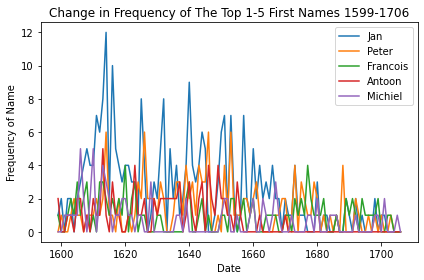

In [15]:
plt.plot(date, Jan, label='Jan')
plt.plot(date, Peter, label='Peter')

plt.plot(date, Francois, label='Francois')
plt.plot(date, Antoon, label='Antoon')

plt.plot(date, Michiel, label='Michiel')



plt.title('Change in Frequency of The Top 1-5 First Names 1599-1706')
plt.xlabel('Date')
plt.ylabel('Frequency of Name')
plt.legend()
plt.tight_layout()
plt.show

Figure Six shows the frequency of the top 1-5 guild members first names between 1599 - 1706. As one can see the frequency of names mirrors that of figure two in that around 1670- 1680 the numbers begin to drop to zero. What is interesting is that popular names like Jan and Peter start with a very high numbers of frequency and around 1660 drop off to almost zero maybe indicating possibly social changes in naming convection or styles of names. 

<function matplotlib.pyplot.show(close=None, block=None)>

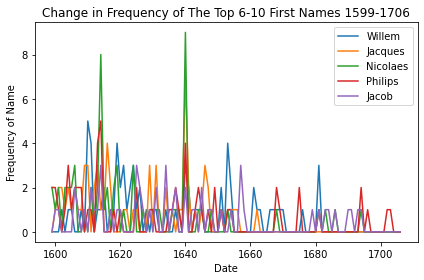

In [16]:
plt.plot(date, Willem, label='Willem')

plt.plot(date, Jacques, label='Jacques')
plt.plot(date, Nicolaes, label='Nicolaes')

plt.plot(date, Philips, label='Philips')
plt.plot(date, Jacob, label='Jacob')


plt.title('Change in Frequency of The Top 6-10 First Names 1599-1706')
plt.xlabel('Date')
plt.ylabel('Frequency of Name')
plt.legend()
plt.tight_layout()
plt.show

Figure Seven shows the frequency of the top 6-10 guild members first names between 1599 - 1706. As one can see that this frequency of names also mirrors figure two but shows an earlier decline of the guild membership around 1660 rather than 1670- 1680 as seen in figure two. One interesting observation see here is the first name of Nicolaes which has two high peaks of 8 names in 1610 and 9 in 1640 but very few names in the years before, after and in between these dates.

<function matplotlib.pyplot.show(close=None, block=None)>

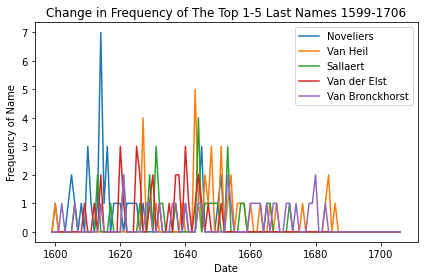

In [17]:
plt.plot(date, Noveliers, label='Noveliers')
plt.plot(date, Van_Heil, label='Van Heil')

plt.plot(date, Sallaert, label='Sallaert')
plt.plot(date, Van_der_Elst, label='Van der Elst')

plt.plot(date, Van_Bronckhorst, label='Van Bronckhorst')


plt.title('Change in Frequency of The Top 1-5 Last Names 1599-1706')
plt.xlabel('Date')
plt.ylabel('Frequency of Name')
plt.legend()
plt.tight_layout()
plt.show

Figure eight shows the frequency of the top 1-5 guild members last names between 1599 - 1706. As one can see the frequency of names mirrors figures above up until 1650 when it takes a sharp decline and stops in 1690, earlier than all other figures. This is an interesting observation that many original families who were present at the beginning of the guild left before the guild itself cease to exist.

<function matplotlib.pyplot.show(close=None, block=None)>

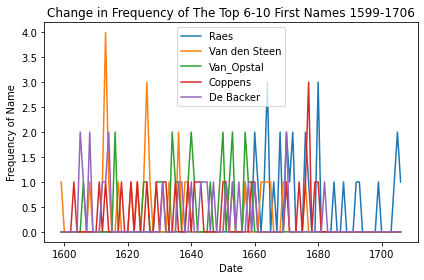

In [18]:
plt.plot(date, Raes, label='Raes')

plt.plot(date, Van_den_Steen, label='Van den Steen')
plt.plot(date, Van_Opstal, label='Van_Opstal')

plt.plot(date, Coppens, label='Coppens')
plt.plot(date, De_Backer, label='De Backer')


plt.title('Change in Frequency of The Top 6-10 First Names 1599-1706')
plt.xlabel('Date')
plt.ylabel('Frequency of Name')
plt.legend()
plt.tight_layout()
plt.show

Figure Seven shows the frequency of the top 6-10 guild members last names between 1599 - 1706. As one can see the frequency of names mirrors the figures above but with a noticeable decline in 1680. One interesting observation is from the last name or family name Raes, who is seen in the beginning of the figure and at the end. What makes it interesting is that they are one of the last family's to stay in the Guild and even have two members present in 1705. This would indicated an interesting story for further historical research.

### Conclusion


To conclude the Caroline project contains some interesting insights into the old Antwerp guild and the society around it during its existence. This data analysis not only show cases the power research one can do using historical data with common data analytic or data science tools to deepen our understanding of history. It also shows that there is an interesting event in 1630 that impacted the guilds membership significant and thus provides evidence for a research project. It also shows that the family name of Raes was a prominent or simply long lasting family within the guild and thus would also make an interesting case for further investigation. 
